# Introduction

In [ ]:
"""
What? Decision tree for regression tree extrapolation

Any tree-based regression model is not able to extrapolate, or make predictions outside of the range of the training
data. 

https://github.com/amueller/introduction_to_ml_with_python
Guido, Sarah, and Andreas Müller. Introduction to machine learning with python. Vol. 282. O'Reilly 
                  Media, 2016.
"""

# Import libraries/modules

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 5
rcParams['font.size'] = 15
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# Read-in dataset

Text(0, 0.5, 'Price in $/Mbyte')

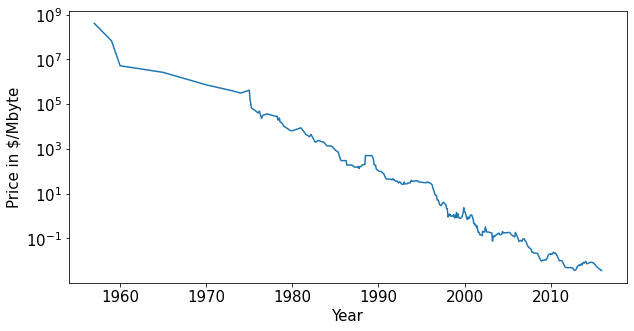

In [13]:
ram_prices = pd.read_csv("../DATASETS/ram_price.csv")

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

# Fit: decision tree vs. linear model

In [14]:
# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# predict prices based on date
X_train = data_train.date[:, np.newaxis]
# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# predict on all data
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

<ipython-input-14-1610066280e7>:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = data_train.date[:, np.newaxis]
<ipython-input-14-1610066280e7>:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_all = ram_prices.date[:, np.newaxis]


# Compare the predictions

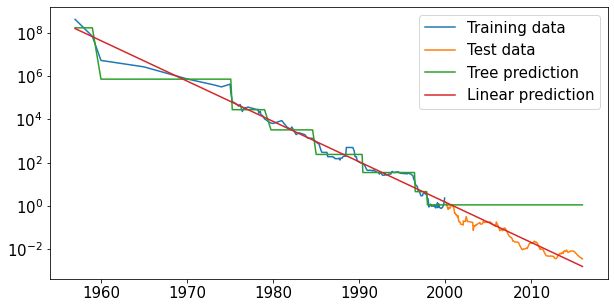

In [15]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

In [ ]:
"""
The difference between the models is quite striking. The linear model approximates the data with a line, as we 
knew it would. This line provides quite a good forecast for the test data (the years after 2000), while glossing 
over some of the finer variations in both the training and the test data. The tree model, on the other hand, makes
perfect predictions on the training data; we did not restrict the complexity of the tree, so it learned the whole 
dataset by heart. However, once we leave the data range for which the model has data, the model simply keeps 
predicting the last known point. The tree has no ability to generate “new” responses, outside of what was seen in 
the training data.
"""